forecasting_notebook.ipynb
Here’s an updated Jupyter notebook that includes more detailed exploratory data analysis (EDA) and model training:

In [4]:
# Sales Forecasting Analysis

## 1. Import Libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder


2. Load and Explore Data

In [5]:
# Load the dataset
data = pd.read_csv('/workspaces/swiss-data-science-demos-/predictive_analytics_forecasting/data/sales_data.csv', parse_dates=['date'])

# Display basic info
data.info()

# Show the first few rows
data.head()

# Check for missing values
data.isnull().sum()

# Summary statistics
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 5000 non-null   datetime64[ns]
 1   store_id             5000 non-null   object        
 2   product_id           5000 non-null   object        
 3   units_sold           5000 non-null   int64         
 4   revenue              5000 non-null   float64       
 5   discount_rate        5000 non-null   float64       
 6   holiday_flag         5000 non-null   int64         
 7   weather_condition    5000 non-null   object        
 8   advertisement_spend  5000 non-null   float64       
 9   season               5000 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 390.8+ KB


,date,units_sold,revenue,discount_rate,holiday_flag,advertisement_spend
count,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2023-01-02 02:38:41.280000,30.032200,2030.009429,0.197847,0.492800,3088.157727
min,2022-01-01 00:00:00,14.000000,270.961227,0.000022,0.000000,201.670866
25%,2022-07-02 18:00:00,26.000000,1187.315906,0.099225,0.000000,1621.054056
50%,2023-01-06 00:00:00,30.000000,1951.450475,0.194935,0.000000,3102.784445
75%,2023-07-02 00:00:00,34.000000,2775.332127,0.298690,1.000000,4547.641091
max,2023-12-31 00:00:00,52.000000,5493.031262,0.399882,1.000000,5999.866899
std,NaN,5.489116,999.011488,0.115203,0.499998,1682.560287


3. Exploratory Data Analysis

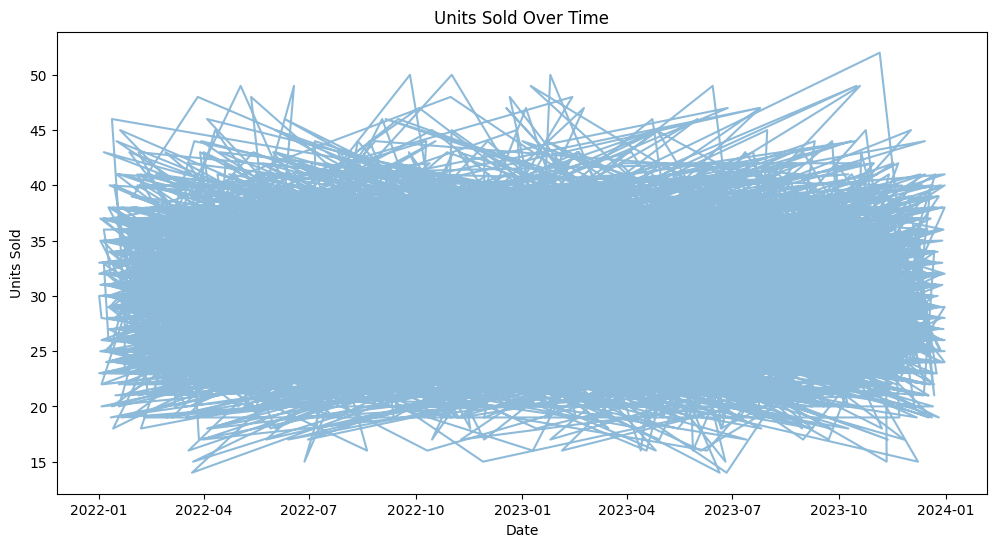

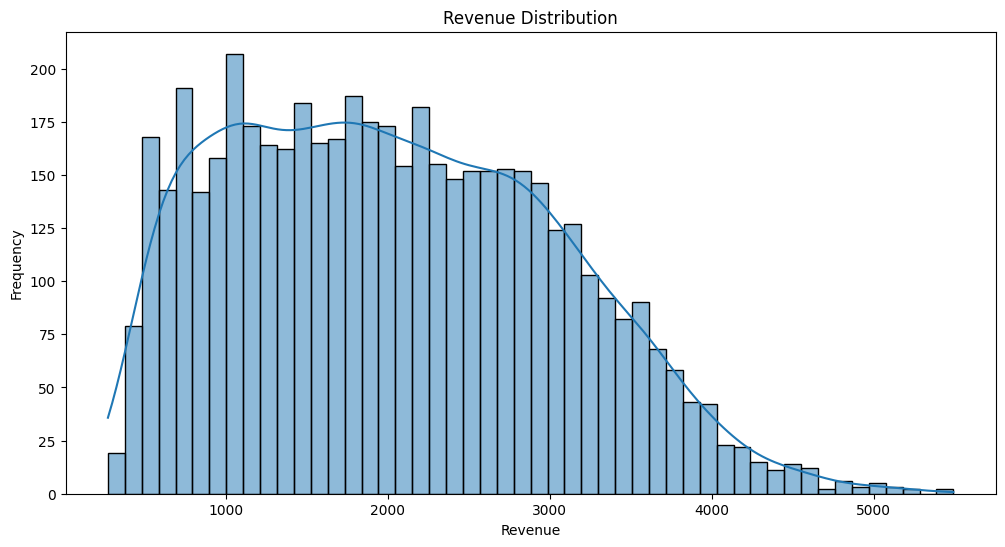

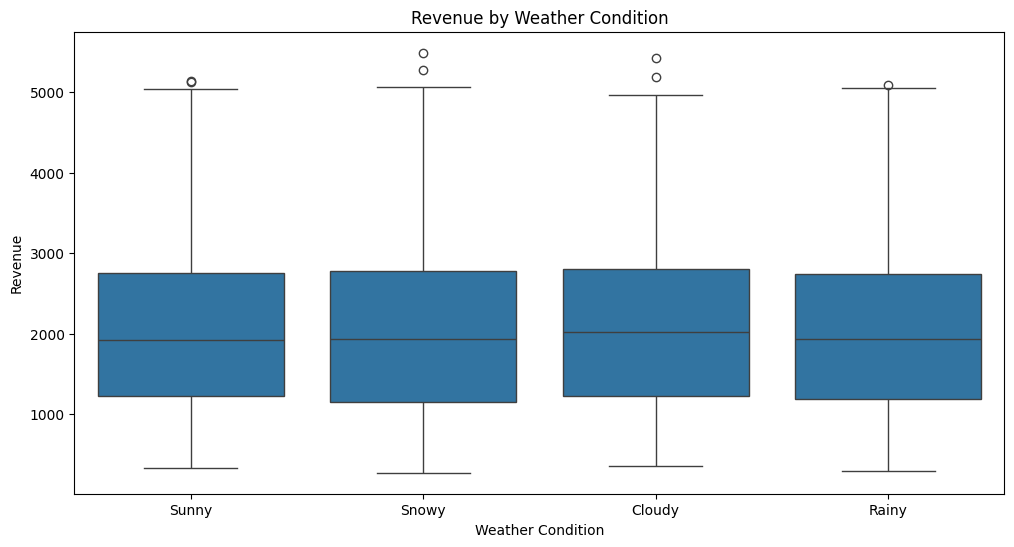

In [6]:
# Plot units sold over time
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['units_sold'], alpha=0.5)
plt.title('Units Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.show()

# Plot revenue distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['revenue'], bins=50, kde=True)
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

# Plot average revenue by weather condition
plt.figure(figsize=(12, 6))
sns.boxplot(x='weather_condition', y='revenue', data=data)
plt.title('Revenue by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Revenue')
plt.show()


4. Feature Engineering

In [7]:
# Create additional features
data['month'] = data['date'].dt.month
data['day_of_week'] = data['date'].dt.dayofweek

# Encode categorical features
label_encoders = {}
for column in ['store_id', 'product_id', 'weather_condition', 'season']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le


5. Train-Test Split

In [8]:
# Define features and target
features = ['store_id', 'product_id', 'units_sold', 'discount_rate', 'holiday_flag', 'weather_condition', 'advertisement_spend', 'month', 'day_of_week', 'season']
X = data[features]
y = data['revenue']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


6. Build and Evaluate Model

In [9]:
# Initialize and train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 793.1232146703534


7. Feature Importances

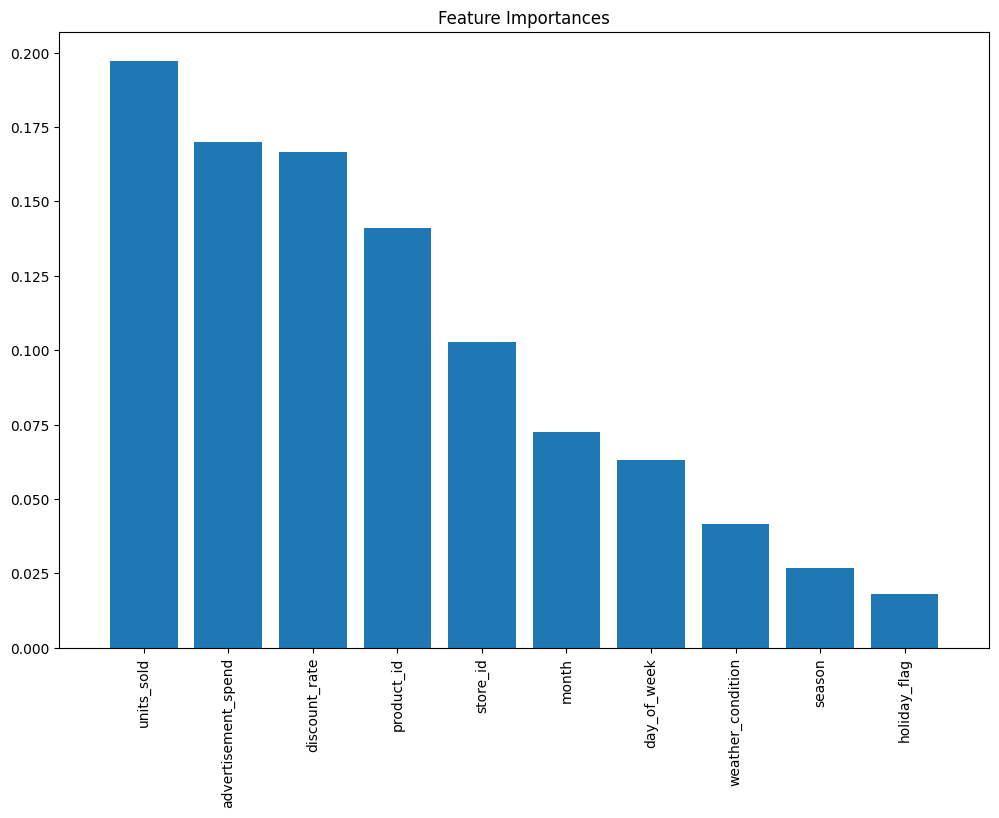

In [10]:
# Plot feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), np.array(features)[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


Final Directory Structure

In [ ]:
predictive_analytics_forecasting/
│   ├── README.md
│   ├── data/
│   │   ├── sales_data.csv
│   │   └── forecast_results.csv (Generated after running the model)
│   ├── code/
│   │   └── forecast_model.py
│   └── notebooks/
│       └── forecasting_notebook.ipynb
└── generate_data.py


To push code from GitHub Codespaces to a GitHub repository, follow these steps. Assuming you already have a Codespace environment set up and a GitHub repository ready, here’s how you can push your changes:

1. Initialize Git (If Not Already Initialized)
If your Codespace project is not already a Git repository, you need to initialize it. Navigate to your project directory in the terminal and run:

In [ ]:
git init

Stage all your changes for commit:

In [ ]:
git add .


Commit Changes
Commit your staged changes with a descriptive message:



In [ ]:
git commit -m "Initial commit with forecasting model and dataset"


Push Changes
Push your commits to the GitHub repository. This will upload your local changes to the main branch (or master, depending on your default branch name) of the remote repository.

In [ ]:
git push -u origin main
